In [1]:
import pandas as pd
from src.data_processing.make_dataset import make_dataset
from src.classification.classify_data import classify_data
from src.classification.train_model import train_model
from src.data_processing.tokenize_data import tokenize_data

In [2]:
configs = [{
    'tokenizer': 'count',
    'model': 'naive_bayes',
    'max_iter': 1000
},
{
    'tokenizer': 'tfidf',
    'model': 'naive_bayes',
    'max_iter': 1000,
    'normalization': False
},
{
    'tokenizer': 'word2vec',
    'model': 'naive_bayes',
    'max_iter': 1000,
    'normalization': False,
    'padding': False,
}]

In [3]:
df = pd.read_csv("E:\\Michal\\Dokumenty\\Studia\\DM\\data-minning\\data\\cleaned_data_v2.csv")

# Optionally tokenize the content column as needed
df['content'] = df['content'].apply(lambda x: x.split() if isinstance(x, str) else x)

Label mapping:
militaria -> 0
sport -> 1
technologia -> 2
wiadomosci -> 3
yapping -> 4
Accuracy: 0.83
Confusion Matrix:
[[156   0  18  23   3]
 [  2 190   4   3   1]
 [ 20   2 158  12   8]
 [ 29   2   5 157   7]
 [  2   3   8  14 173]]


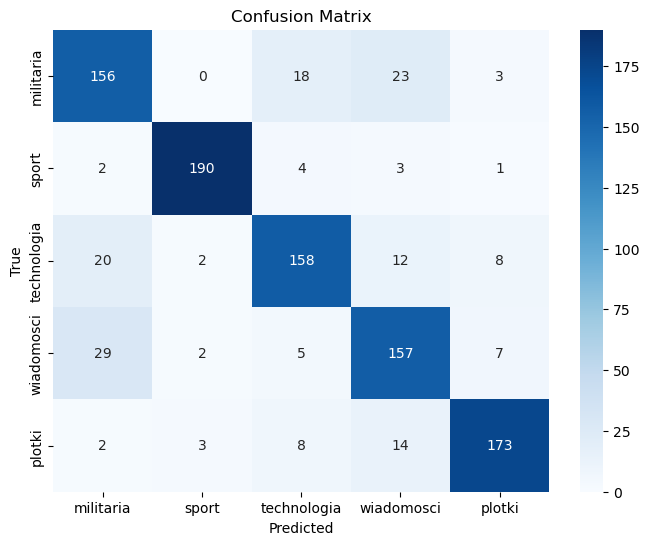

Label mapping:
militaria -> 0
sport -> 1
technologia -> 2
wiadomosci -> 3
yapping -> 4
Accuracy: 0.84
Confusion Matrix:
[[159   0  15  23   3]
 [  1 192   2   4   1]
 [ 19   2 158  10  11]
 [ 31   2   5 157   5]
 [  1   2   5  15 177]]


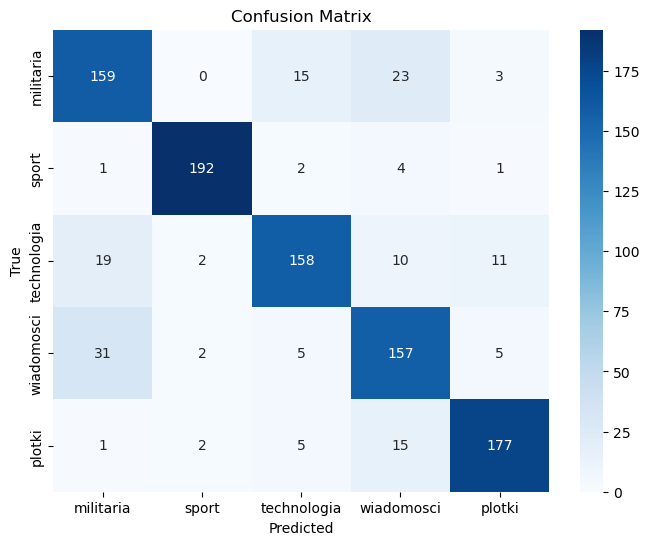

Label mapping:
militaria -> 0
sport -> 1
technologia -> 2
wiadomosci -> 3
yapping -> 4
Accuracy: 0.84
Confusion Matrix:
[[144   1  15  39   1]
 [  1 190   1   4   4]
 [ 20   1 163  11   5]
 [ 29   0   2 163   6]
 [  0   2   4  16 178]]


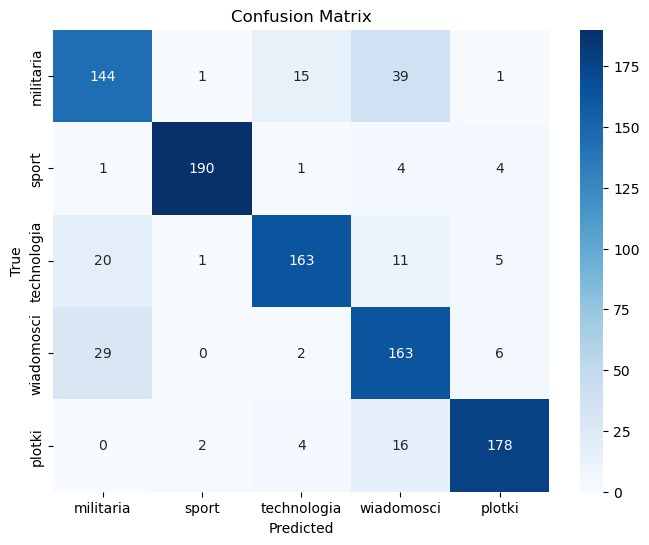

In [4]:
for config in configs:
    tokenizer = config['tokenizer']
    model_name = config['model']
    max_iter = config['max_iter'] if 'max_iter' in config else 1000
    padding = config['padding'] if 'padding' in config else True
    normalization = config['normalization'] if 'normalization' in config else True

    _df = df.copy()

    # Tokenize data
    _df = tokenize_data(df=_df, tokenizer=tokenizer)

    # Split the data
    X_train, X_test, y_train, y_test, label_encoder = make_dataset(df=_df, model_name=model_name, padding=padding,
                                                    normalization=normalization, tokenizer_name=tokenizer)

    # Train the model
    model = train_model(X_train, y_train, X_test, y_test, model_name, max_iter, tokenizer)

    # Classify data
    classify_data(model_name, model, X_test, y_test, label_encoder)

In [5]:
configs = [{
    'tokenizer': 'count',
    'model': 'logistic_regression',
    'max_iter': 1000
},]

Label mapping:
militaria -> 0
sport -> 1
technologia -> 2
wiadomosci -> 3
yapping -> 4
Accuracy: 0.84
Confusion Matrix:
[[158   0  17  22   3]
 [  1 188   6   3   2]
 [ 22   1 163   6   8]
 [ 29   0   9 157   5]
 [  2   4   5  13 176]]


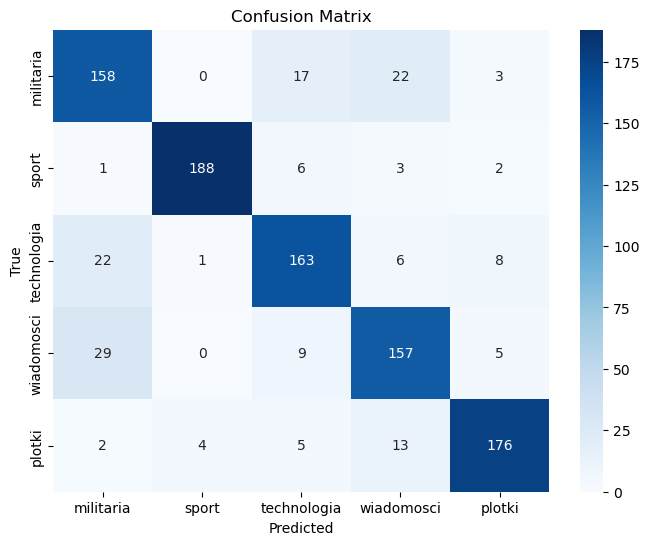

In [6]:
from sklearn.linear_model import LogisticRegression

for config in configs:
    tokenizer = config['tokenizer']
    model_name = config['model']
    max_iter = config['max_iter'] if 'max_iter' in config else 1000
    padding = config['padding'] if 'padding' in config else True
    normalization = config['normalization'] if 'normalization' in config else True

    _df = df.copy()

    # Tokenize data
    _df = tokenize_data(df=_df, tokenizer=tokenizer)

    # Split the data
    X_train, X_test, y_train, y_test, label_encoder = make_dataset(df=_df, model_name=model_name, padding=padding,
                                                    normalization=normalization, tokenizer_name=tokenizer)

    text_columns = ['headline', 'content', 'category']
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.drop(columns=text_columns)
        X_test = X_test.drop(columns=text_columns)

    # Train the model
    model = LogisticRegression(max_iter=max_iter, class_weight=None, solver='liblinear', C=0.897607171386133)
    model.fit(X_train, y_train)

    # Classify data
    classify_data(model_name, model, X_test, y_test, label_encoder)

In [7]:
configs = [{
    'tokenizer': 'tfidf',
    'model': 'logistic_regression',
    'max_iter': 1000,
    'normalization': False
}]

Label mapping:
militaria -> 0
sport -> 1
technologia -> 2
wiadomosci -> 3
yapping -> 4
Accuracy: 0.85
Confusion Matrix:
[[165   0  15  19   1]
 [  0 192   5   3   0]
 [ 24   2 160   6   8]
 [ 31   1   6 157   5]
 [  2   2   3  15 178]]


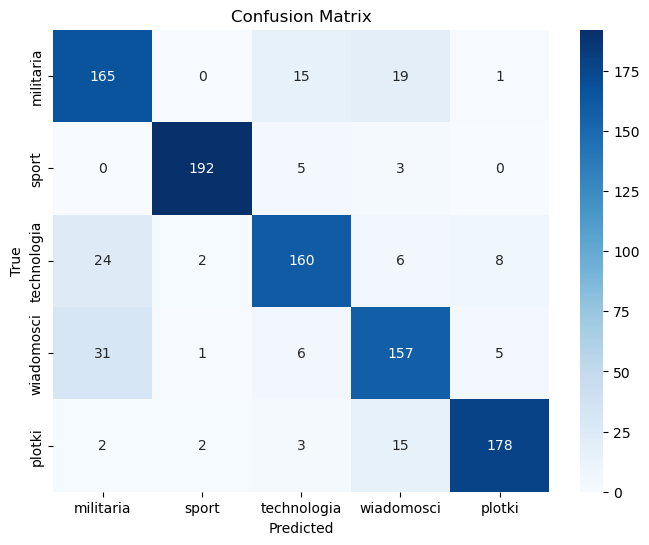

In [8]:
for config in configs:
    tokenizer = config['tokenizer']
    model_name = config['model']
    max_iter = config['max_iter'] if 'max_iter' in config else 1000
    padding = config['padding'] if 'padding' in config else True
    normalization = config['normalization'] if 'normalization' in config else True

    _df = df.copy()

    # Tokenize data
    _df = tokenize_data(df=_df, tokenizer=tokenizer)

    # Split the data
    X_train, X_test, y_train, y_test, label_encoder = make_dataset(df=_df, model_name=model_name, padding=padding,
                                                    normalization=normalization, tokenizer_name=tokenizer)

    text_columns = ['headline', 'content', 'category']
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.drop(columns=text_columns)
        X_test = X_test.drop(columns=text_columns)

    # Train the model
    model = LogisticRegression(max_iter=max_iter, class_weight='balanced', solver='liblinear', C=2.9642986202006076)
    model.fit(X_train, y_train)

    # Classify data
    classify_data(model_name, model, X_test, y_test, label_encoder)

In [9]:
configs = [{
    'tokenizer': 'word2vec',
    'model': 'logistic_regression',
    'max_iter': 1000,
    'normalization': False,
    'padding': False,
}]

Label mapping:
militaria -> 0
sport -> 1
technologia -> 2
wiadomosci -> 3
yapping -> 4
Accuracy: 0.87
Confusion Matrix:
[[154   2  16  28   0]
 [  2 196   0   2   0]
 [ 22   2 166   4   6]
 [ 20   4   4 163   9]
 [  0   2   1  10 187]]


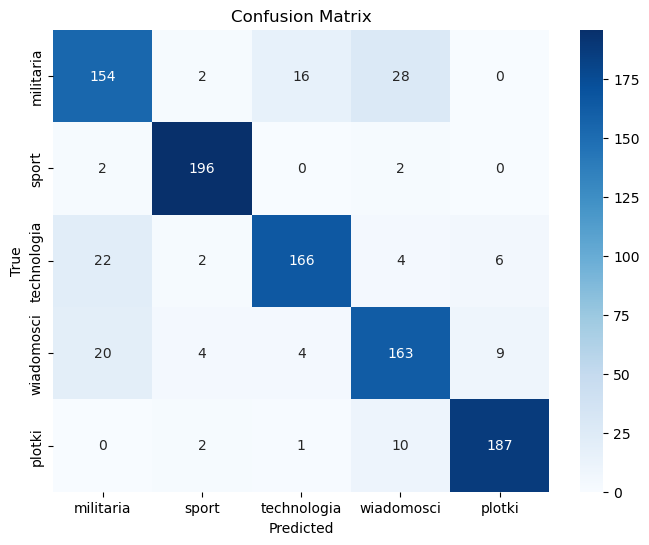

In [10]:
for config in configs:
    tokenizer = config['tokenizer']
    model_name = config['model']
    max_iter = config['max_iter'] if 'max_iter' in config else 1000
    padding = config['padding'] if 'padding' in config else True
    normalization = config['normalization'] if 'normalization' in config else True

    _df = df.copy()

    # Tokenize data
    _df = tokenize_data(df=_df, tokenizer=tokenizer)

    # Split the data
    X_train, X_test, y_train, y_test, label_encoder = make_dataset(df=_df, model_name=model_name, padding=padding,
                                                    normalization=normalization, tokenizer_name=tokenizer)

    text_columns = ['headline', 'content', 'category']
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.drop(columns=text_columns)
        X_test = X_test.drop(columns=text_columns)

    # Train the model
    model = LogisticRegression(max_iter=max_iter, class_weight=None, solver='liblinear', C=95.85562937494936)
    model.fit(X_train, y_train)

    # Classify data
    classify_data(model_name, model, X_test, y_test, label_encoder)

In [12]:
configs = [{
    'tokenizer': 'count',
    'model': 'svm',
    'max_iter': 750
}]

Label mapping:
militaria -> 0
sport -> 1
technologia -> 2
wiadomosci -> 3
yapping -> 4


C:\Users\kanio\anaconda3\envs\data-minning\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=750).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.84
Confusion Matrix:
[[160   0  16  22   2]
 [  2 185   7   4   2]
 [ 20   0 169   4   7]
 [ 35   0   9 151   5]
 [  2   1   8  15 174]]


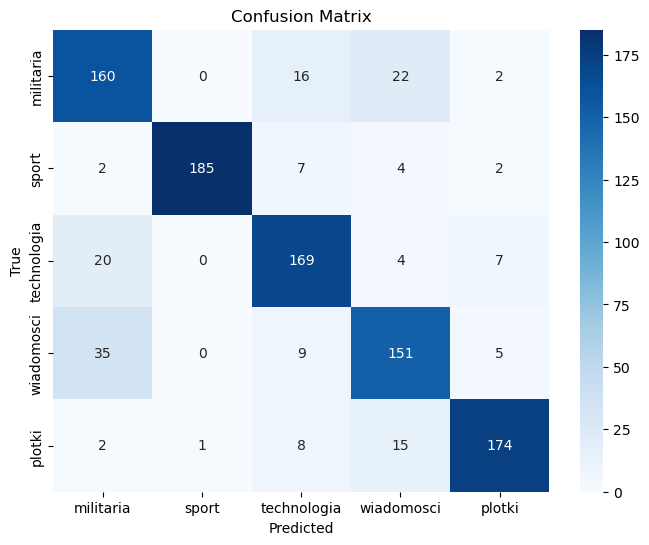

In [13]:
from sklearn.svm import SVC

for config in configs:
    tokenizer = config['tokenizer']
    model_name = config['model']
    max_iter = config['max_iter'] if 'max_iter' in config else 1000
    padding = config['padding'] if 'padding' in config else True
    normalization = config['normalization'] if 'normalization' in config else True

    _df = df.copy()

    # Tokenize data
    _df = tokenize_data(df=_df, tokenizer=tokenizer)

    # Split the data
    X_train, X_test, y_train, y_test, label_encoder = make_dataset(df=_df, model_name=model_name, padding=padding,
                                                    normalization=normalization, tokenizer_name=tokenizer)

    text_columns = ['headline', 'content', 'category']
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.drop(columns=text_columns)
        X_test = X_test.drop(columns=text_columns)

    # Train the model
    model = SVC(max_iter=max_iter, random_state=42, C=0.08589122261799725, class_weight='balanced', gamma='scale', kernel='linear')
    model.fit(X_train, y_train)

    # Classify data
    classify_data(model_name, model, X_test, y_test, label_encoder)

In [14]:
configs = [{
    'tokenizer': 'tfidf',
    'model': 'svm',
    'max_iter': 750,
    'normalization': False
}]

Label mapping:
militaria -> 0
sport -> 1
technologia -> 2
wiadomosci -> 3
yapping -> 4


C:\Users\kanio\anaconda3\envs\data-minning\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=750).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.85
Confusion Matrix:
[[164   0  16  18   2]
 [  1 188   5   4   2]
 [ 21   2 165   5   7]
 [ 32   0   6 158   4]
 [  2   1   4  15 178]]


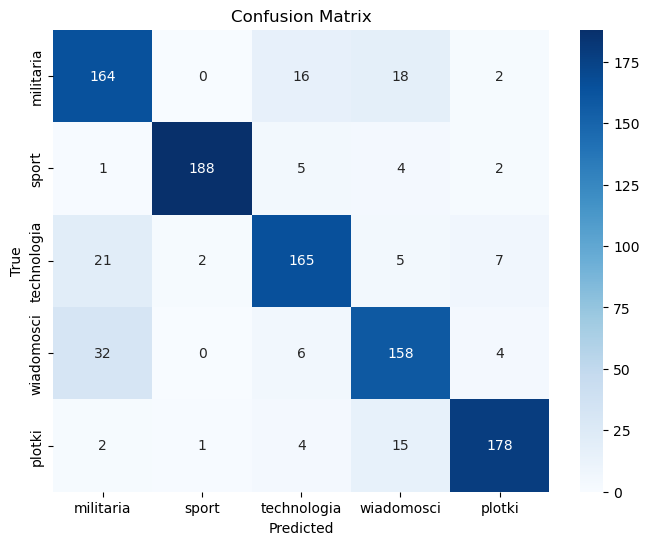

In [15]:
for config in configs:
    tokenizer = config['tokenizer']
    model_name = config['model']
    max_iter = config['max_iter'] if 'max_iter' in config else 1000
    padding = config['padding'] if 'padding' in config else True
    normalization = config['normalization'] if 'normalization' in config else True

    _df = df.copy()

    # Tokenize data
    _df = tokenize_data(df=_df, tokenizer=tokenizer)

    # Split the data
    X_train, X_test, y_train, y_test, label_encoder = make_dataset(df=_df, model_name=model_name, padding=padding,
                                                    normalization=normalization, tokenizer_name=tokenizer)

    text_columns = ['headline', 'content', 'category']
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.drop(columns=text_columns)
        X_test = X_test.drop(columns=text_columns)

    # Train the model
    model = SVC(max_iter=max_iter, random_state=42, C=2.617512043800288, class_weight=None, gamma='scale', kernel='rbf')
    model.fit(X_train, y_train)

    # Classify data
    classify_data(model_name, model, X_test, y_test, label_encoder)

In [24]:
configs = [{
    'tokenizer': 'word2vec',
    'model': 'svm',
    'max_iter': 750,
    'normalization': False,
    'padding': False,
}]

Label mapping:
militaria -> 0
sport -> 1
technologia -> 2
wiadomosci -> 3
yapping -> 4


C:\Users\kanio\anaconda3\envs\data-minning\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=750).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.86
Confusion Matrix:
[[164   0   9  25   2]
 [  0 193   0   4   3]
 [ 22   2 161   6   9]
 [ 26   2   3 159  10]
 [  1   4   4  10 181]]


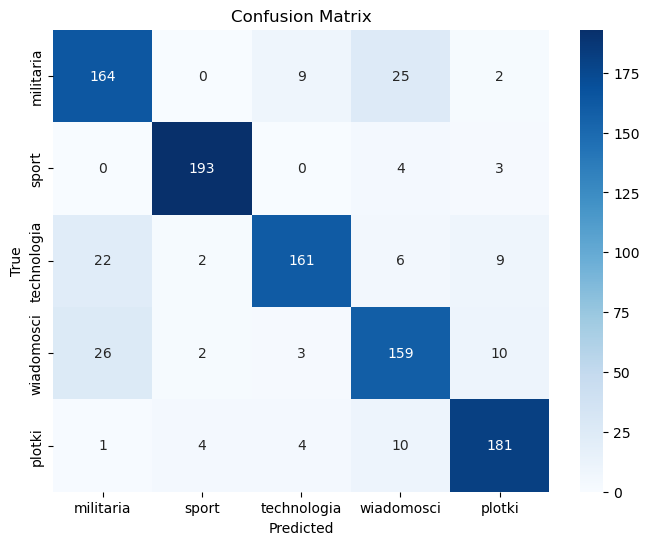

In [25]:
for config in configs:
    tokenizer = config['tokenizer']
    model_name = config['model']
    max_iter = config['max_iter'] if 'max_iter' in config else 1000
    padding = config['padding'] if 'padding' in config else True
    normalization = config['normalization'] if 'normalization' in config else True

    _df = df.copy()

    # Tokenize data
    _df = tokenize_data(df=_df, tokenizer=tokenizer)

    # Split the data
    X_train, X_test, y_train, y_test, label_encoder = make_dataset(df=_df, model_name=model_name, padding=padding,
                                                    normalization=normalization, tokenizer_name=tokenizer)

    text_columns = ['headline', 'content', 'category']
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.drop(columns=text_columns)
        X_test = X_test.drop(columns=text_columns)

    # Train the model
    model = SVC(max_iter=max_iter, random_state=42, C=35.08948628288845, class_weight='balanced', gamma='auto', kernel='rbf')
    model.fit(X_train, y_train)

    # Classify data
    classify_data(model_name, model, X_test, y_test, label_encoder)

In [18]:
configs = [{
    'tokenizer': 'count',
    'model': 'random_forest'
}]

Label mapping:
militaria -> 0
sport -> 1
technologia -> 2
wiadomosci -> 3
yapping -> 4
Accuracy: 0.80
Confusion Matrix:
[[152   2  16  23   7]
 [  0 186   3   6   5]
 [ 13   2 154  13  18]
 [ 33   3  10 145   9]
 [  2   4  11  23 160]]


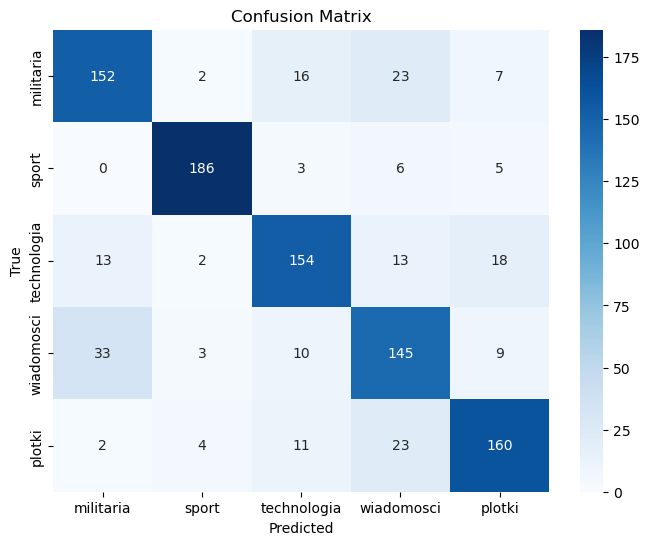

In [19]:
from sklearn.ensemble import RandomForestClassifier

for config in configs:
    tokenizer = config['tokenizer']
    model_name = config['model']
    max_iter = config['max_iter'] if 'max_iter' in config else 1000
    padding = config['padding'] if 'padding' in config else True
    normalization = config['normalization'] if 'normalization' in config else True

    _df = df.copy()

    # Tokenize data
    _df = tokenize_data(df=_df, tokenizer=tokenizer)

    # Split the data
    X_train, X_test, y_train, y_test, label_encoder = make_dataset(df=_df, model_name=model_name, padding=padding,
                                                    normalization=normalization, tokenizer_name=tokenizer)

    text_columns = ['headline', 'content', 'category']
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.drop(columns=text_columns)
        X_test = X_test.drop(columns=text_columns)

    # Train the model
    model = RandomForestClassifier(n_estimators=272, max_depth=None, min_samples_split=4)
    model.fit(X_train, y_train)

    # Classify data
    classify_data(model_name, model, X_test, y_test, label_encoder)

In [20]:
configs = [{
    'tokenizer': 'tfidf',
    'model': 'random_forest',
    'normalization': False
}]

Label mapping:
militaria -> 0
sport -> 1
technologia -> 2
wiadomosci -> 3
yapping -> 4
Accuracy: 0.81
Confusion Matrix:
[[160   1  18  17   4]
 [  2 187   1   5   5]
 [ 16   2 151  10  21]
 [ 39   3   4 146   8]
 [  6   3   9  20 162]]


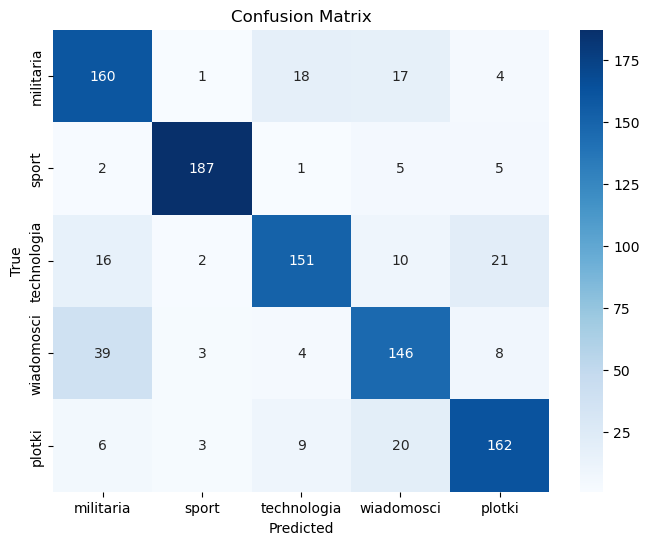

In [21]:
for config in configs:
    tokenizer = config['tokenizer']
    model_name = config['model']
    max_iter = config['max_iter'] if 'max_iter' in config else 1000
    padding = config['padding'] if 'padding' in config else True
    normalization = config['normalization'] if 'normalization' in config else True

    _df = df.copy()

    # Tokenize data
    _df = tokenize_data(df=_df, tokenizer=tokenizer)

    # Split the data
    X_train, X_test, y_train, y_test, label_encoder = make_dataset(df=_df, model_name=model_name, padding=padding,
                                                    normalization=normalization, tokenizer_name=tokenizer)

    text_columns = ['headline', 'content', 'category']
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.drop(columns=text_columns)
        X_test = X_test.drop(columns=text_columns)

    # Train the model
    model = RandomForestClassifier(n_estimators=458, max_depth=None, min_samples_split=4)
    model.fit(X_train, y_train)

    # Classify data
    classify_data(model_name, model, X_test, y_test, label_encoder)

In [22]:
configs = [{
    'tokenizer': 'word2vec',
    'model': 'random_forest',
    'normalization': False,
    'padding': False,
}]

Label mapping:
militaria -> 0
sport -> 1
technologia -> 2
wiadomosci -> 3
yapping -> 4
Accuracy: 0.85
Confusion Matrix:
[[159   0  10  30   1]
 [  1 191   2   5   1]
 [ 27   1 155   9   8]
 [ 26   0   2 168   4]
 [  0   2   5  14 179]]


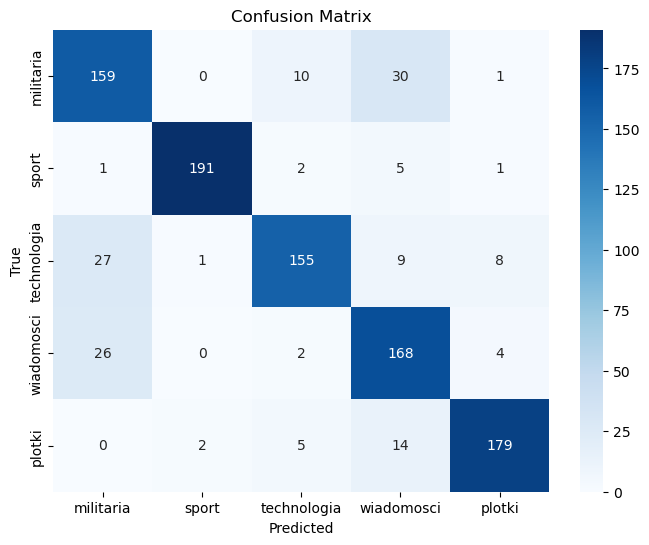

In [23]:
for config in configs:
    tokenizer = config['tokenizer']
    model_name = config['model']
    max_iter = config['max_iter'] if 'max_iter' in config else 1000
    padding = config['padding'] if 'padding' in config else True
    normalization = config['normalization'] if 'normalization' in config else True

    _df = df.copy()

    # Tokenize data
    _df = tokenize_data(df=_df, tokenizer=tokenizer)

    # Split the data
    X_train, X_test, y_train, y_test, label_encoder = make_dataset(df=_df, model_name=model_name, padding=padding,
                                                    normalization=normalization, tokenizer_name=tokenizer)

    text_columns = ['headline', 'content', 'category']
    if isinstance(X_train, pd.DataFrame):
        X_train = X_train.drop(columns=text_columns)
        X_test = X_test.drop(columns=text_columns)

    # Train the model
    model = RandomForestClassifier(n_estimators=189, max_depth=None, min_samples_split=7)
    model.fit(X_train, y_train)

    # Classify data
    classify_data(model_name, model, X_test, y_test, label_encoder)